In [1]:
import pandas as pd

# Paths to the datasets
training_data_34_66_path = '/data/notebook_files/training_data_34_66.csv'
training_data_10_90_path = '/data/notebook_files/training_data_10_90.csv'
X_test_path = '/data/notebook_files/X_test.csv'
y_test_path = '/data/notebook_files/y_test.csv'

# Loading the datasets
training_data_34_66 = pd.read_csv(training_data_34_66_path)
training_data_10_90 = pd.read_csv(training_data_10_90_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# Gaussian Naive Bayes Computation on the 34:66 Class Distribution

In [3]:
X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

y_test = y_test.squeeze()  

Accuracy: 0.9769846564376251
Recall/Sensitivity: 0.8571428571428571
Specificity: 0.9771911930219471
Precision: 0.0608254887762491
F2 Score: 0.23688663282571912
Matthews Correlation Coefficient (MCC): 0.22480796354826
Balanced Classification Rate (BCR): 0.9171670250824021
ROC AUC: 0.9624773358274091
Confusion Matrix:
[[55567  1297]
 [   14    84]]
TN: 55567, FP: 1297, FN: 14, TP: 84


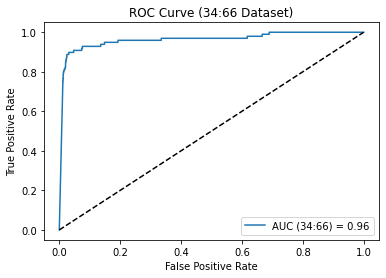

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, recall_score, precision_score, confusion_matrix, 
                             roc_curve, roc_auc_score, matthews_corrcoef, fbeta_score)
import matplotlib.pyplot as plt


# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the model on the 34:66 resampled training data
gnb_model.fit(X_train_34_66, y_train_34_66)

# Predict on the test set
y_pred_34_66 = gnb_model.predict(X_test)
y_pred_proba_34_66 = gnb_model.predict_proba(X_test)[:, 1]  

# Calculate evaluation metrics
accuracy_34_66 = accuracy_score(y_test, y_pred_34_66)
recall_34_66 = recall_score(y_test, y_pred_34_66)
precision_34_66 = precision_score(y_test, y_pred_34_66)
f2_score_34_66 = fbeta_score(y_test, y_pred_34_66, beta=2) 
roc_auc_34_66 = roc_auc_score(y_test, y_pred_proba_34_66)
conf_matrix_34_66 = confusion_matrix(y_test, y_pred_34_66)
mcc_34_66 = matthews_corrcoef(y_test, y_pred_34_66)

# Extracting TN, FP, FN, TP from confusion matrix
tn_34_66, fp_34_66, fn_34_66, tp_34_66 = conf_matrix_34_66.ravel()

# Specificity or True Negative Rate
specificity_34_66 = tn_34_66 / (tn_34_66 + fp_34_66)

# Balanced Classification Rate (BCR) 
bcr_34_66 = (recall_34_66 + specificity_34_66) / 2

# Print the metrics
print(f'Accuracy: {accuracy_34_66}')
print(f'Recall/Sensitivity: {recall_34_66}')
print(f'Specificity: {specificity_34_66}')
print(f'Precision: {precision_34_66}')
print(f'F2 Score: {f2_score_34_66}')
print(f'Matthews Correlation Coefficient (MCC): {mcc_34_66}')
print(f'Balanced Classification Rate (BCR): {bcr_34_66}')
print(f'ROC AUC: {roc_auc_34_66}')
print(f'Confusion Matrix:\n{conf_matrix_34_66}')
print(f'TN: {tn_34_66}, FP: {fp_34_66}, FN: {fn_34_66}, TP: {tp_34_66}')

# ROC Curve
fpr_34_66, tpr_34_66, _ = roc_curve(y_test, y_pred_proba_34_66)
plt.plot(fpr_34_66, tpr_34_66, label=f'AUC (34:66) = {roc_auc_34_66:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (34:66 Dataset)')
plt.legend(loc='lower right')
plt.show()

# Cross-Validating 34:66 Sample

In [7]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef

# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f2_score': make_scorer(fbeta_score, beta=2),
           'mcc': make_scorer(matthews_corrcoef)}

# Perform cross-validation
cv_results = cross_validate(gnb_model, X_train_34_66, y_train_34_66, cv=cv_strategy, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
recall_scores = cv_results['test_recall']
precision_scores = cv_results['test_precision']
f2_scores = cv_results['test_f2_score']
mcc_scores = cv_results['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy: {np.mean(accuracy_scores)} (+/- {np.std(accuracy_scores)})')
print(f'Cross-validated recall: {np.mean(recall_scores)} (+/- {np.std(recall_scores)})')
print(f'Cross-validated precision: {np.mean(precision_scores)} (+/- {np.std(precision_scores)})')
print(f'Cross-validated F2 score: {np.mean(f2_scores)} (+/- {np.std(f2_scores)})')
print(f'Cross-validated MCC: {np.mean(mcc_scores)} (+/- {np.std(mcc_scores)})')

Cross-validated accuracy: 0.944806452639169 (+/- 0.0005378058294316675)
Cross-validated recall: 0.8482019213852352 (+/- 0.0014585919256037934)
Cross-validated precision: 0.9280848445050275 (+/- 0.0017567192876136036)
Cross-validated F2 score: 0.8630582014860284 (+/- 0.0012249577498535385)
Cross-validated MCC: 0.8514989403238097 (+/- 0.0014570062259474123)


# Gaussian Naive Bayes Computation on the 10:90 Class Distribution

In [8]:
X_train_10_90 = training_data_10_90.drop('Class', axis=1)
y_train_10_90 = training_data_10_90['Class']

y_test = y_test.squeeze() 

Accuracy (10:90): 0.9777044345353042
Recall/Sensitivity (10:90): 0.8571428571428571
Specificity (10:90): 0.9779122115925718
Precision (10:90): 0.0626865671641791
F2 Score (10:90): 0.2424942263279445
Matthews Correlation Coefficient (MCC) (10:90): 0.22833430130626278
Balanced Classification Rate (BCR) (10:90): 0.9175275343677145
ROC AUC (10:90): 0.9638405059547737
Confusion Matrix (10:90):
[[55608  1256]
 [   14    84]]
TN (10:90): 55608, FP (10:90): 1256, FN (10:90): 14, TP (10:90): 84


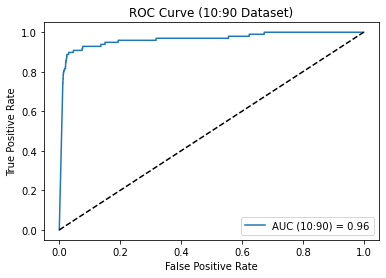

In [9]:
# Initialize the Gaussian Naive Bayes classifier
gnb_model_10_90 = GaussianNB()

# Train the model on the 10:90 resampled training data
gnb_model_10_90.fit(X_train_10_90, y_train_10_90)

# Predict on the test set
y_pred_10_90 = gnb_model_10_90.predict(X_test)
y_pred_proba_10_90 = gnb_model_10_90.predict_proba(X_test)[:, 1]  

# Calculate evaluation metrics
accuracy_10_90 = accuracy_score(y_test, y_pred_10_90)
recall_10_90 = recall_score(y_test, y_pred_10_90)
precision_10_90 = precision_score(y_test, y_pred_10_90)
f2_score_10_90 = fbeta_score(y_test, y_pred_10_90, beta=2)
roc_auc_10_90 = roc_auc_score(y_test, y_pred_proba_10_90)
conf_matrix_10_90 = confusion_matrix(y_test, y_pred_10_90)
mcc_10_90 = matthews_corrcoef(y_test, y_pred_10_90)

# Extracting TN, FP, FN, TP from confusion matrix
tn_10_90, fp_10_90, fn_10_90, tp_10_90 = conf_matrix_10_90.ravel()

# Specificity or True Negative Rate
specificity_10_90 = tn_10_90 / (tn_10_90 + fp_10_90)

# Balanced Classification Rate (BCR)
bcr_10_90 = (recall_10_90 + specificity_10_90) / 2

# Print the metrics
print(f'Accuracy (10:90): {accuracy_10_90}')
print(f'Recall/Sensitivity (10:90): {recall_10_90}')
print(f'Specificity (10:90): {specificity_10_90}')
print(f'Precision (10:90): {precision_10_90}')
print(f'F2 Score (10:90): {f2_score_10_90}')
print(f'Matthews Correlation Coefficient (MCC) (10:90): {mcc_10_90}')
print(f'Balanced Classification Rate (BCR) (10:90): {bcr_10_90}')
print(f'ROC AUC (10:90): {roc_auc_10_90}')
print(f'Confusion Matrix (10:90):\n{conf_matrix_10_90}')
print(f'TN (10:90): {tn_10_90}, FP (10:90): {fp_10_90}, FN (10:90): {fn_10_90}, TP (10:90): {tp_10_90}')

# ROC Curve
fpr_10_90, tpr_10_90, _ = roc_curve(y_test, y_pred_proba_10_90)
plt.plot(fpr_10_90, tpr_10_90, label=f'AUC (10:90) = {roc_auc_10_90:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10:90 Dataset)')
plt.legend(loc='lower right')
plt.show()

# Cross-Validating 10:90 Sample

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
import numpy as np

# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f2_score': make_scorer(fbeta_score, beta=2),
           'mcc': make_scorer(matthews_corrcoef)}

# Perform cross-validation
cv_results = cross_validate(gnb_model, X_train_10_90, y_train_10_90, cv=cv_strategy, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
recall_scores = cv_results['test_recall']
precision_scores = cv_results['test_precision']
f2_scores = cv_results['test_f2_score']
mcc_scores = cv_results['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy: {np.mean(accuracy_scores)} (+/- {np.std(accuracy_scores)})')
print(f'Cross-validated recall: {np.mean(recall_scores)} (+/- {np.std(recall_scores)})')
print(f'Cross-validated precision: {np.mean(precision_scores)} (+/- {np.std(precision_scores)})')
print(f'Cross-validated F2 score: {np.mean(f2_scores)} (+/- {np.std(f2_scores)})')
print(f'Cross-validated MCC: {np.mean(mcc_scores)} (+/- {np.std(mcc_scores)})')

Cross-validated accuracy: 0.9667179599912069 (+/- 0.000713261559933567)
Cross-validated recall: 0.8491096944383381 (+/- 0.005044765509744934)
Cross-validated precision: 0.7977960337002348 (+/- 0.0036078910586875203)
Cross-validated F2 score: 0.8383228534619827 (+/- 0.004507051605440394)
Cross-validated MCC: 0.8047832267276462 (+/- 0.00433724440066743)
